Description: Introdução à métodos de classificação.

Created by: Amanda P. / Leandro A. da Silva (amanda@kognitalab.com, leandro@kognita.com.br)

Created at: 19/6/2018

Last modification: 19/6/2018

<< Código para fins didáticos, apenas >>

#### Importanto algumas bibliotecas úteis:

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import bigrams
import itertools
from collections import Counter
import random
from unidecode import unidecode
import os
#from os import listdir
#from os.path import isfile, join
import numpy as np
import scipy
import scipy.stats as stats
import time
import re



from sklearn.model_selection import train_test_split

#scores
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score


from sklearn.feature_extraction.text import CountVectorizer


plt.style.use('ggplot')

#### Temos 2 datasets: um com reviews positivos e outro com reviews negativos de filmes. Este dataset foi extraído do site de crítica de cinema Rotten Tomatoes. Carregando os datasets:

In [2]:
# reviews positivos
df_pos = pd.read_csv('rt_polarity_pos.dat', sep = '\t', header = None, encoding = 'utf-8')
df_pos.columns = ['text']

# creating a column with the "positive = 1" label:
df_pos['polarity'] = 1
df_pos['polarity'] = df_pos['polarity'].astype(int)

In [3]:
df_pos

,text,polarity
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1
5,the film provides some great insight into the ...,1
6,offers that rare combination of entertainment ...,1
7,perhaps no picture ever made has more literall...,1
8,steers turns in a snappy screenplay that curls...,1
9,take care of my cat offers a refreshingly diff...,1


In [4]:
# reviews negativos
df_neg = pd.read_csv('rt_polarity_neg.dat', sep = '\t', header = None, encoding = 'utf-8')
df_neg.columns = ['text']

# creating a column with the "positive = 1" label:
df_neg['polarity'] = 0
df_neg['polarity'] = df_neg['polarity'].astype(int)

In [5]:
df_neg

,text,polarity
0,"simplistic , silly and tedious .",0
1,"it's so laddish and juvenile , only teenage bo...",0
2,exploitative and largely devoid of the depth o...,0
3,[garbus] discards the potential for pathologic...,0
4,a visually flashy but narratively opaque and e...,0
5,"the story is also as unoriginal as they come ,...",0
6,about the only thing to give the movie points ...,0
7,not so much farcical as sour .,0
8,unfortunately the story and the actors are ser...,0
9,all the more disquieting for its relatively go...,0


#### Observe que os datasets possuem o mesmo número de entradas:

In [6]:
print len(df_pos)
print len(df_neg)

5331
5331


##### Dizemos então que os datasets, que servirão para treinarmos e testarmos nosso modelo de classificação, estão *balanceados*. Datasets balanceados facilitam bastante a tarefa de criação de um modelo de classificação.

#### Inspecionando alguns reviews:

In [7]:
print df_pos['text'][0]

the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . 


In [8]:
print df_pos['text'][1]

the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r . r . tolkien's middle-earth . 


In [9]:
print df_neg['text'][0]

simplistic , silly and tedious . 


In [10]:
print df_neg['text'][1]

it's so laddish and juvenile , only teenage boys could possibly find it funny . 


#### Uma função para limpeza de texto. Repare que, como dessa vez estamos lidando com textos em ingês, temos que, da biblioteca nltk, usar stopwords em inglês.

In [11]:
# a function to perform text cleaning. Enter, for example df['text'], and get a list of clean text
def cleaning(dfcolumn, stopwords_language):
    
    text_list_zero = dfcolumn.tolist()
    
    print ' '
    print ' '
    print 'eliminating excess of blank space: '
    print ' '
    
    text_list_one = []
    time1 = time.time()
    for k in xrange(0, len(text_list_zero)): #tamanho da coluna 
        test = k % 100
        if test == 0:
            print k
            
        text_list_one.append( ' '.join(text_list_zero[k].split()) )
        
    print 'step time: ', time.time() - time1
    print 'partial total time: ', time.time() - time1    
    print ' '
    print ' '

    print ' '
    print ' '
    print 'eliminating urls: '
    print ' '
    
    text_list_2 = []
    time2 = time.time()
    for k in xrange(0, len(text_list_one)):
        test = k % 100
        if test == 0:
            print k
        text = text_list_one[k]
        text_clean = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)
        text_list_2.append(text_clean) #remove a url do texto do tweet
    print 'step time: ', time.time() - time2
    print 'partial total time: ', time.time() - time1
    print ' '
    print ' '
    

    # strings to erase:
    
    toerase =  ['www.','.com','.',',','!','?',';','@','...','/','(',')','"',':',\
               '=','#','-','&','|','%','*','"',"'s",'[', ']'," ' ","$", '\n', '>', '<', '+',\
               'rss', '{', '}',
               'website', 'https:','https', 'http', 'http:', "'", 'feedly', 'sign', 'comment', \
               'clique aqui', 'click here', 'comments']

    
    print ' '
    print ' '
    print 'eliminating more strings... '
    print ' '    
    
    
    text_list_3 = []
    time3 = time.time()
    for k in xrange(0, len(text_list_2)):
        test = k % 100
        if test == 0:
            print k        
        
        text_zero = unidecode((text_list_2[k].encode('utf-8')).decode('utf-8')).lower()
        
        vector_text = []
        temp = text_zero 
        for j in xrange(0, len(toerase)):    
            temp2 = temp.replace(toerase[j],' ') 
            
            vector_text.append(temp2)  
            temp = vector_text[j] 
        text_one = vector_text[-1].strip()    
        tokens = [w for w in word_tokenize(text_one) if not w in stopwords.words(stopwords_language)]

       
        text_final = ' '.join(tokens)
        text_list_3.append(text_final)
    print 'step time: ', time.time() - time3
    print 'Total time: ', time.time() - time1
    print ' '
    print ' '
    
    return text_list_3

#### Fundindo os dataframes:

In [12]:
df = pd.concat([df_pos, df_neg]).reset_index(drop = True)

In [13]:
df

,text,polarity
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1
5,the film provides some great insight into the ...,1
6,offers that rare combination of entertainment ...,1
7,perhaps no picture ever made has more literall...,1
8,steers turns in a snappy screenplay that curls...,1
9,take care of my cat offers a refreshingly diff...,1


#### Limpando o texto:

In [14]:
df['clean_text'] = cleaning(df['text'], 'english')

 
 
eliminating excess of blank space: 
 
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
step time:  0.0549998283386
partial total time:  0.0549998283386
 
 
 
 
eliminating urls: 
 
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6

#### Verificando o dataframe:

In [15]:
df

,text,polarity,clean_text
0,the rock is destined to be the 21st century's ...,1,rock destined 21st century new conan going mak...
1,"the gorgeously elaborate continuation of "" the...",1,gorgeously elaborate continuation lord rings t...
2,effective but too-tepid biopic,1,effective tepid biopic
3,if you sometimes like to go to the movies to h...,1,sometimes like go movies fun wasabi good place...
4,"emerges as something rare , an issue movie tha...",1,emerges something rare issue movie honest keen...
5,the film provides some great insight into the ...,1,film provides great insight neurotic mindset c...
6,offers that rare combination of entertainment ...,1,offers rare combination entertainment education
7,perhaps no picture ever made has more literall...,1,perhaps picture ever made literally showed roa...
8,steers turns in a snappy screenplay that curls...,1,steers turns snappy screenplay curls edges cle...
9,take care of my cat offers a refreshingly diff...,1,take care cat offers refreshingly different sl...


#### Reordenando as colunas, só por uma questão estética:

In [16]:
df = df.loc[:, ['text', 'clean_text', 'polarity']]

In [17]:
df

,text,clean_text,polarity
0,the rock is destined to be the 21st century's ...,rock destined 21st century new conan going mak...,1
1,"the gorgeously elaborate continuation of "" the...",gorgeously elaborate continuation lord rings t...,1
2,effective but too-tepid biopic,effective tepid biopic,1
3,if you sometimes like to go to the movies to h...,sometimes like go movies fun wasabi good place...,1
4,"emerges as something rare , an issue movie tha...",emerges something rare issue movie honest keen...,1
5,the film provides some great insight into the ...,film provides great insight neurotic mindset c...,1
6,offers that rare combination of entertainment ...,offers rare combination entertainment education,1
7,perhaps no picture ever made has more literall...,perhaps picture ever made literally showed roa...,1
8,steers turns in a snappy screenplay that curls...,steers turns snappy screenplay curls edges cle...,1
9,take care of my cat offers a refreshingly diff...,take care cat offers refreshingly different sl...,1


#### Misturando as duas classes:

In [18]:
df = df.sample(frac=1).reset_index(drop=True)


In [19]:
df[0:10]

,text,clean_text,polarity
0,. . . a funny yet dark and seedy clash of cul...,funny yet dark seedy clash cultures generations,1
1,"a disaster of a drama , saved only by its wing...",disaster drama saved winged assailants,0
2,no film could possibly be more contemptuous of...,film could possibly contemptuous single female...,0
3,"a worthwhile documentary , whether you're into...",worthwhile documentary whether rap even may st...,1
4,with a cast that includes some of the top acto...,cast includes top actors working independent f...,1
5,"as a film director , labute continues to impro...",film director labute continues improve,1
6,"some body is a shaky , uncertain film that nev...",body shaky uncertain film nevertheless touches...,0
7,there are many definitions of 'time waster' bu...,many definitions time waster movie must surely...,0
8,"dragonfly has no atmosphere , no tension -- no...",dragonfly atmosphere tension nothing costner f...,0
9,a meatier deeper beginning and/or ending would...,meatier deeper beginning ending would easily t...,1


#### Vetorização das colunas que serão usadas na tarefa de classificação ("polarity" e "clean_text")

In [20]:
vectorizer = CountVectorizer()

review = vectorizer.fit_transform(df['clean_text']).toarray()
polaridade = df['polarity'].as_matrix()



#### Divide a base em treino e teste com 70% para treino e 30% para teste database do review

In [21]:
x_train_review, x_test_review, y_train_review, y_test_review = \
train_test_split(review, polaridade, test_size=0.3, random_state = 0)


#### Neste tutorial introdutório,  selecionaremos o classificador "Naive Bayes multinomial"
Mais detalhes:(http://scikit-learn.org/stable/modules/naive_bayes.html)

In [22]:
#importando o modelo
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()


In [23]:
#training
nb.fit(x_train_review, y_train_review)

#testing
y_predicted_review = nb.predict(x_test_review)

#### Acurácia do modelo:

In [24]:
acc_score_review = accuracy_score(y_test_review, y_predicted_review)
print acc_score_review

0.756798999687


#### F1 score:

In [25]:
f1_score_review = f1_score(y_test_review, y_predicted_review, average='macro')  
print f1_score_review

0.756732225619


#### Precisão:

In [26]:
prec_score_review = precision_score(y_test_review, y_predicted_review, average='macro')  
print prec_score_review

0.756744049472


#### Matriz de confusão:
In binary classification, the count of true negatives is C{0,0}, 
false negatives is C{1,0}, true positives is C{1,1} and false positives is C{0,1}.

In [27]:
cf_matrix_review = confusion_matrix(y_test_review, y_predicted_review)
cf_matrix_review

array([[1184,  391],
       [ 387, 1237]], dtype=int64)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 0 )
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Normalized confusion matrix
[[ 0.75  0.25]
 [ 0.24  0.76]]


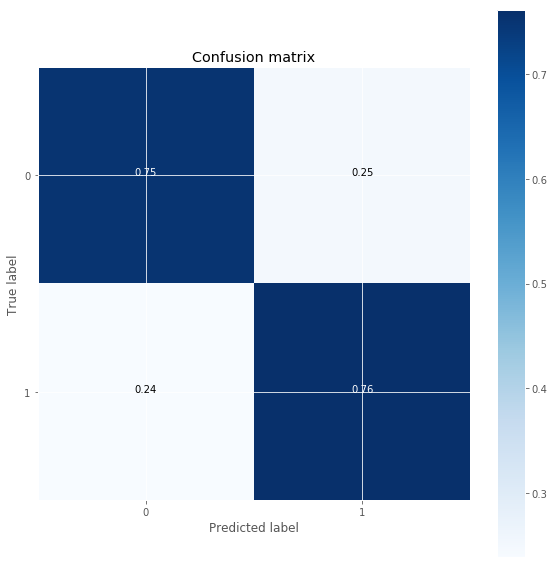

In [29]:
np.set_printoptions(precision=2)

plt.figure(figsize=(8,8))
plot_confusion_matrix(cf_matrix_review, classes=[0, 1],
                      title='Confusion matrix')

#### Resta testar a consistência do modelo frente a outras escolhas de separação entre dados de treino e dados de teste. Temos que ter certeza que os resultados obtidos não são particulares para a escolha do par anterior de treino-teste. Para isso, podemos utilizar um dos procedimento existentes para validação cruzada (cross-validation), que consiste em sortear n pares treino-teste e acompanhar como variam as métricas do modelo.

In [30]:
# função que realiza a cross-validation
def cross_validation(nsamples):
    
    acuracy_list = []
    f1_list = []
    precision_list = []
    time_list = []
    global_start_time = time.time()
    for k in xrange(0, nsamples):
        start_time = time.time()
        
        print 'Runnning sample number {} of {} samples.'.format(k+1, nsamples)
        
        nb = MultinomialNB()
        
        # eliminando a variável random_state para que a cada iteração um novo sorteio seja realizado:
        x_train_review, x_test_review, y_train_review, y_test_review = \
        train_test_split(review, polaridade, test_size=0.3)


        #training
        nb.fit(x_train_review, y_train_review)

        #testing
        y_predicted_review = nb.predict(x_test_review)



        acc_score_review = accuracy_score(y_test_review, y_predicted_review)
        acuracy_list.append(acc_score_review)

        f1_score_review = f1_score(y_test_review, y_predicted_review, average='macro')
        f1_list.append(f1_score_review)


        prec_score_review = precision_score(y_test_review, y_predicted_review, average='macro')
        precision_list.append(prec_score_review)
        
        
        
        print 'accuracy: ', acc_score_review
        print 'f1 score: ', f1_score_review
        print 'precision:', prec_score_review
        print ' '
        print ' '
        
        
        end_time = time.time()
        time_elapsed = end_time - global_start_time
        dt = end_time - start_time
        time_list.append(dt)
        
        total_time_forecast = np.mean(time_list)*nsamples
        
        print 'Step time: ', dt
        print 'Partial elapsed time: ', time_elapsed
        print 'Total time forecasting: ', total_time_forecast
        print ' '
        print ' '
        print ' '
        print ' '
        
        
    print 'Finish!'
    print ' '
    print ' '
        
    mean_accuracy = np.mean(acuracy_list)
    std_accuracy = np.std(acuracy_list)
    
    mean_f1 = np.mean(f1_list)
    std_f1 = np.std(f1_list)
    
    mean_precision = np.mean(precision_list)
    std_precision = np.std(precision_list)
    
    
    return {'average_accuracy': mean_accuracy, 'std_accuracy': std_accuracy ,'average_f1': mean_f1, 'std_f1': std_f1,\
            'mean_precision': mean_precision, 'std_precision': std_precision}
    
    

#### Aplicando a função acima definida, escolhendo um total de 10 amostras:

In [31]:
cross_result_dict = cross_validation(10)

Runnning sample number 1 of 10 samples.
accuracy:  0.762738355736
f1 score:  0.762717487787
precision: 0.762954658695
 
 
Step time:  1.68499994278
Partial elapsed time:  1.68499994278
Total time forecasting:  16.8499994278
 
 
 
 
Runnning sample number 2 of 10 samples.
accuracy:  0.768990309472
f1 score:  0.768982995379
precision: 0.769383992922
 
 
Step time:  1.83400011063
Partial elapsed time:  3.51900005341
Total time forecasting:  17.595000267
 
 
 
 
Runnning sample number 3 of 10 samples.
accuracy:  0.762425758049
f1 score:  0.76232763367
precision: 0.762796467715
 
 
Step time:  1.82699990273
Partial elapsed time:  5.34599995613
Total time forecasting:  17.8199998538
 
 
 
 
Runnning sample number 4 of 10 samples.
accuracy:  0.771803688653
f1 score:  0.771789751095
precision: 0.771949176666
 
 
Step time:  1.82400012016
Partial elapsed time:  7.17000007629
Total time forecasting:  17.9250001907
 
 
 
 
Runnning sample number 5 of 10 samples.
accuracy:  0.762738355736
f1 score

#### O resultado da validação cruzada:

In [32]:
cross_result_dict

{'average_accuracy': 0.76548921537980619,
 'average_f1': 0.7654624614685005,
 'mean_precision': 0.7656063667515165,
 'std_accuracy': 0.0036529818463248796,
 'std_f1': 0.0036663250081731763,
 'std_precision': 0.0036734509150363691}

### <font color='red'> Exercício: repita a análise sem filtrar as stopwords. As métricas do modelo melhoram ou pioram?  </font>